In [1]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np
import spacy
import pandas as pd
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
import heapq
import yaml
from nltk.stem import WordNetLemmatizer, PorterStemmer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
import numpy as np
from array import array
import copy

nlp = spacy.load('en_core_web_lg')

df = pd.read_csv('./scraper/archive/react-useeffect-final.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])

print(df.shape)
display(df.head())

print("\n")
print("All Columns DF")
df.columns

/Users/shaun/miniforge3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(3336, 22)


POSTID                                           POSTLINK  \
0  75158231  https://stackoverflow.com/questions/75158231/r...   
1  75140656  https://stackoverflow.com/questions/75140656/h...   
2  75140656  https://stackoverflow.com/questions/75140656/h...   
3  75140656  https://stackoverflow.com/questions/75140656/h...   
4  75140656  https://stackoverflow.com/questions/75140656/h...   

                                           POSTTITLE  \
0  React useEffect OnSubmit Rendering Post api mu...   
1  How do I set a timer on React/UseEffect hook a...   
2  How do I set a timer on React/UseEffect hook a...   
3  How do I set a timer on React/UseEffect hook a...   
4  How do I set a timer on React/UseEffect hook a...   

                                            POSTBODY  \
0  \n                \n<pre class="lang-js s-code...   
1  \n                \n<p>I'm trying to set a tim...   
2  \n                \n<p>I'm trying to set a tim...   
3  \n                \n<p>I'm trying to set a tim...   
4  \n                \n<p>I'm trying to set a tim...   

                    POSTDATE POSTVOTECOUNTS          COMMENTID  COMMENTSCORE  \
0  ('2023-01-18 11:02:43Z',)         ('0',)                NaN           NaN   
1  ('2023-01-16 23:25:33Z',)         ('1',)                NaN           NaN   
2  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598809           1.0   
3  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598829           NaN   
4  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598848           NaN   

  COMMENTUSERNAME                                        COMMENTTEXT  ...  \
0             NaN                                                NaN  ...   
1             NaN                                                NaN  ...   
2        jsejcksn  Rather than <a href="https://en.wikipedia.org/...  ...   
3            Gary  Yes, good suggestion. This was just a test to ...  ...   
4           Chris  I would have done more or less what you have d...  ...   

  ANSWERTEXT  ANSWERBODY ANSWERDATETIME ANSWERVOTECOUNTS ANSWERCMTID  \
0        NaN         NaN            NaN              NaN         NaN   
1        NaN         NaN            NaN              NaN         NaN   
2        NaN         NaN            NaN              NaN         NaN   
3        NaN         NaN            NaN              NaN         NaN   
4        NaN         NaN            NaN              NaN         NaN   

  ANSWERCMTTEXT ANSWERCMTBODY ANSWERCMTDATETIME ANSWERCMTVOTECOUNTS  \
0           NaN           NaN               NaN                 NaN   
1           NaN           NaN               NaN                 NaN   
2           NaN           NaN               NaN                 NaN   
3           NaN           NaN               NaN                 NaN   
4           NaN           NaN               NaN                 NaN   

           TYPE  
0          post  
1          post  
2  post_comment  
3  post_comment  
4  post_comment  

[5 rows x 22 columns]



All Columns DF


Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME',
       'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT',
       'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID',
       'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME',
       'ANSWERCMTVOTECOUNTS', 'TYPE'],
      dtype='object')

In [2]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy();
dPOST = dPOST.drop(columns=['COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dPOST = dPOST[dPOST['TYPE'] == 'post']
display(dPOST.head(3))

dfPC = pd.DataFrame(columns=ALL_COLS)
dfPC = df.copy();
dfPC = dfPC.drop(columns=['ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dfPC = dfPC[dfPC['TYPE'] == 'post_comment']
display(dfPC.head(3))

dfA = pd.DataFrame(columns=ALL_COLS)
dfA = df.copy();
dfA = dfA.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])

dfAAC = dfA[dfA['TYPE'] == 'answer']
display(dfAAC.head(3))

dFAC = pd.DataFrame(columns=ALL_COLS)
dFAC = df.copy();
dFAC = dFAC.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS'])
dFACT = dFAC[dFAC['TYPE'] == 'answer_comment']
display(dFACT.head(3))

print("Post DF")
print(dPOST.columns)
print('\n')

print("Post Comment DF")
print(dfPC.columns)
print('\n')

print("Answer DF")
print(dfAAC.columns)
print('\n')

print("Answer Comment DF")
print(dFACT.columns)
print('\n')

POSTID                                           POSTLINK  \
0   75158231  https://stackoverflow.com/questions/75158231/r...   
1   75140656  https://stackoverflow.com/questions/75140656/h...   
10  75130904  https://stackoverflow.com/questions/75130904/h...   

                                            POSTTITLE  \
0   React useEffect OnSubmit Rendering Post api mu...   
1   How do I set a timer on React/UseEffect hook a...   
10  How to avoid a small delay in scrolling on rea...   

                                             POSTBODY  \
0   \n                \n<pre class="lang-js s-code...   
1   \n                \n<p>I'm trying to set a tim...   
10  \n                \n<p>I have a component that...   

                     POSTDATE POSTVOTECOUNTS  TYPE  
0   ('2023-01-18 11:02:43Z',)         ('0',)  post  
1   ('2023-01-16 23:25:33Z',)         ('1',)  post  
10  ('2023-01-16 06:36:31Z',)         ('2',)  post

POSTID                                           POSTLINK  \
2  75140656  https://stackoverflow.com/questions/75140656/h...   
3  75140656  https://stackoverflow.com/questions/75140656/h...   
4  75140656  https://stackoverflow.com/questions/75140656/h...   

                                           POSTTITLE  \
2  How do I set a timer on React/UseEffect hook a...   
3  How do I set a timer on React/UseEffect hook a...   
4  How do I set a timer on React/UseEffect hook a...   

                                            POSTBODY  \
2  \n                \n<p>I'm trying to set a tim...   
3  \n                \n<p>I'm trying to set a tim...   
4  \n                \n<p>I'm trying to set a tim...   

                    POSTDATE POSTVOTECOUNTS          COMMENTID  COMMENTSCORE  \
2  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598809           1.0   
3  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598829           NaN   
4  ('2023-01-16 23:25:33Z',)         ('1',)  comment-132598848           NaN   

  COMMENTUSERNAME                                        COMMENTTEXT  \
2        jsejcksn  Rather than <a href="https://en.wikipedia.org/...   
3            Gary  Yes, good suggestion. This was just a test to ...   
4           Chris  I would have done more or less what you have d...   

                               COMMENTDATETIME          TYPE  
2  2023-01-16 23:34:48Z, License: CC BY-SA 4.0  post_comment  
3  2023-01-16 23:37:21Z, License: CC BY-SA 4.0  post_comment  
4  2023-01-16 23:39:58Z, License: CC BY-SA 4.0  post_comment

POSTID                                          POSTTITLE    ANSWERID  \
7   75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   
11  75130904  How to avoid a small delay in scrolling on rea...  75131129.0   
15  75122338  React useEffect called twice even with strict ...  75122385.0   

                                           ANSWERTEXT  \
7   Here's a cleaner setup:\nMove the getUsers out...   
11  It sounds like you may need: useLayoutEffect, ...   
15  The issue here is that the useEffect hook is m...   

                                           ANSWERBODY  \
7   ('\n<p>Here\'s a cleaner setup:</p>\n<ol>\n<li...   
11  ('\n<p>It sounds like  you may need: <a href="...   
15  ('\n<p>The issue here is that the <code>useEff...   

                                 ANSWERDATETIME ANSWERVOTECOUNTS    TYPE  
7   2023-01-16 23:54:17Z, License: CC BY-SA 4.0           ('0',)  answer  
11  2023-01-16 07:38:44Z, License: CC BY-SA 4.0           ('2',)  answer  
15  2023-01-15 02:00:46Z, License: CC BY-SA 4.0           ('4',)  answer

POSTID                                          POSTTITLE    ANSWERID  \
8   75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   
9   75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   
12  75130904  How to avoid a small delay in scrolling on rea...  75131129.0   

       ANSWERCMTID                                      ANSWERCMTTEXT  \
8   ('132598956',)  Using setTimeout like this without the users s...   
9   ('132599241',)  @jsejcksn I think the intended behaviour is to...   
12  ('132582008',)  it works! thank you! never used useLayoutEffec...   

                                        ANSWERCMTBODY ANSWERCMTDATETIME  \
8   ('\n                \n                <span cl...        2 days ago   
9   ('\n                \n                <span cl...        2 days ago   
12  ('\n                \n                <span cl...    Jan 16 at 7:38   

   ANSWERCMTVOTECOUNTS            TYPE  
8                ('',)  answer_comment  
9                ('',)  answer_comment  
12               ('',)  answer_comment

Post DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'TYPE'],
      dtype='object')


Post Comment DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME',
       'COMMENTTEXT', 'COMMENTDATETIME', 'TYPE'],
      dtype='object')


Answer DF
Index(['POSTID', 'POSTTITLE', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY',
       'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'TYPE'],
      dtype='object')


Answer Comment DF
Index(['POSTID', 'POSTTITLE', 'ANSWERID', 'ANSWERCMTID', 'ANSWERCMTTEXT',
       'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS', 'TYPE'],
      dtype='object')




# Explanatory Analysis

#### Clean out noisy values

In [3]:
import warnings
warnings.filterwarnings('ignore')

dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"(", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r")", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"'", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r",", '')

dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"(", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r")", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"'", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r",", '')
display(dPOST.head(1))

dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"(", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r")", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"'", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r",", '')

dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"(", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r")", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"'", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['COMMENTDATETIME'] = dfPC['COMMENTDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
dfPC['COMMENTUSERNAME'] = dfPC['COMMENTUSERNAME'].str.replace(r"segFault", " ")
display(dfPC.head(1))

dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"(", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r")", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"'", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r",", '')

dfAAC['ANSWERDATETIME'] = dfAAC['ANSWERDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
display(dfAAC.head(1))

dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"(", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r")", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"'", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r",", '')

dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"(", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r")", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"'", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r",", '')
display(dFACT.head(1))

POSTID                                           POSTLINK  \
0  75158231  https://stackoverflow.com/questions/75158231/r...   

                                           POSTTITLE  \
0  React useEffect OnSubmit Rendering Post api mu...   

                                            POSTBODY              POSTDATE  \
0  \n                \n<pre class="lang-js s-code...  2023-01-18 11:02:43Z   

  POSTVOTECOUNTS  TYPE  
0              0  post

POSTID                                           POSTLINK  \
2  75140656  https://stackoverflow.com/questions/75140656/h...   

                                           POSTTITLE  \
2  How do I set a timer on React/UseEffect hook a...   

                                            POSTBODY              POSTDATE  \
2  \n                \n<p>I'm trying to set a tim...  2023-01-16 23:25:33Z   

  POSTVOTECOUNTS          COMMENTID  COMMENTSCORE COMMENTUSERNAME  \
2              1  comment-132598809           1.0        jsejcksn   

                                         COMMENTTEXT       COMMENTDATETIME  \
2  Rather than <a href="https://en.wikipedia.org/...  2023-01-16 23:34:48Z   

           TYPE  
2  post_comment

POSTID                                          POSTTITLE    ANSWERID  \
7  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

                                          ANSWERTEXT  \
7  Here's a cleaner setup:\nMove the getUsers out...   

                                          ANSWERBODY        ANSWERDATETIME  \
7  ('\n<p>Here\'s a cleaner setup:</p>\n<ol>\n<li...  2023-01-16 23:54:17Z   

  ANSWERVOTECOUNTS    TYPE  
7                0  answer

POSTID                                          POSTTITLE    ANSWERID  \
8  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

  ANSWERCMTID                                      ANSWERCMTTEXT  \
8   132598956  Using setTimeout like this without the users s...   

                                       ANSWERCMTBODY ANSWERCMTDATETIME  \
8  ('\n                \n                <span cl...        2 days ago   

  ANSWERCMTVOTECOUNTS            TYPE  
8                      answer_comment

#### Handle Missing Values

In [4]:
# transform empty values to NaN
dPOST = dPOST.replace(r'^\s*$', np.nan, regex=True)
dfPC = dfPC.replace(r'^\s*$', np.nan, regex=True)
dfAAC = dfAAC.replace(r'^\s*$', np.nan, regex=True)
dFACT = dFACT.replace(r'^\s*$', np.nan, regex=True)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

POSTID                                           POSTLINK  \
0  75158231  https://stackoverflow.com/questions/75158231/r...   

                                           POSTTITLE  \
0  React useEffect OnSubmit Rendering Post api mu...   

                                            POSTBODY              POSTDATE  \
0  \n                \n<pre class="lang-js s-code...  2023-01-18 11:02:43Z   

  POSTVOTECOUNTS  TYPE  
0              0  post

POSTID                                           POSTLINK  \
2  75140656  https://stackoverflow.com/questions/75140656/h...   

                                           POSTTITLE  \
2  How do I set a timer on React/UseEffect hook a...   

                                            POSTBODY              POSTDATE  \
2  \n                \n<p>I'm trying to set a tim...  2023-01-16 23:25:33Z   

  POSTVOTECOUNTS          COMMENTID  COMMENTSCORE COMMENTUSERNAME  \
2              1  comment-132598809           1.0        jsejcksn   

                                         COMMENTTEXT       COMMENTDATETIME  \
2  Rather than <a href="https://en.wikipedia.org/...  2023-01-16 23:34:48Z   

           TYPE  
2  post_comment

POSTID                                          POSTTITLE    ANSWERID  \
7  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

                                          ANSWERTEXT  \
7  Here's a cleaner setup:\nMove the getUsers out...   

                                          ANSWERBODY        ANSWERDATETIME  \
7  ('\n<p>Here\'s a cleaner setup:</p>\n<ol>\n<li...  2023-01-16 23:54:17Z   

  ANSWERVOTECOUNTS    TYPE  
7                0  answer

POSTID                                          POSTTITLE    ANSWERID  \
8  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

  ANSWERCMTID                                      ANSWERCMTTEXT  \
8   132598956  Using setTimeout like this without the users s...   

                                       ANSWERCMTBODY ANSWERCMTDATETIME  \
8  ('\n                \n                <span cl...        2 days ago   

  ANSWERCMTVOTECOUNTS            TYPE  
8                 NaN  answer_comment

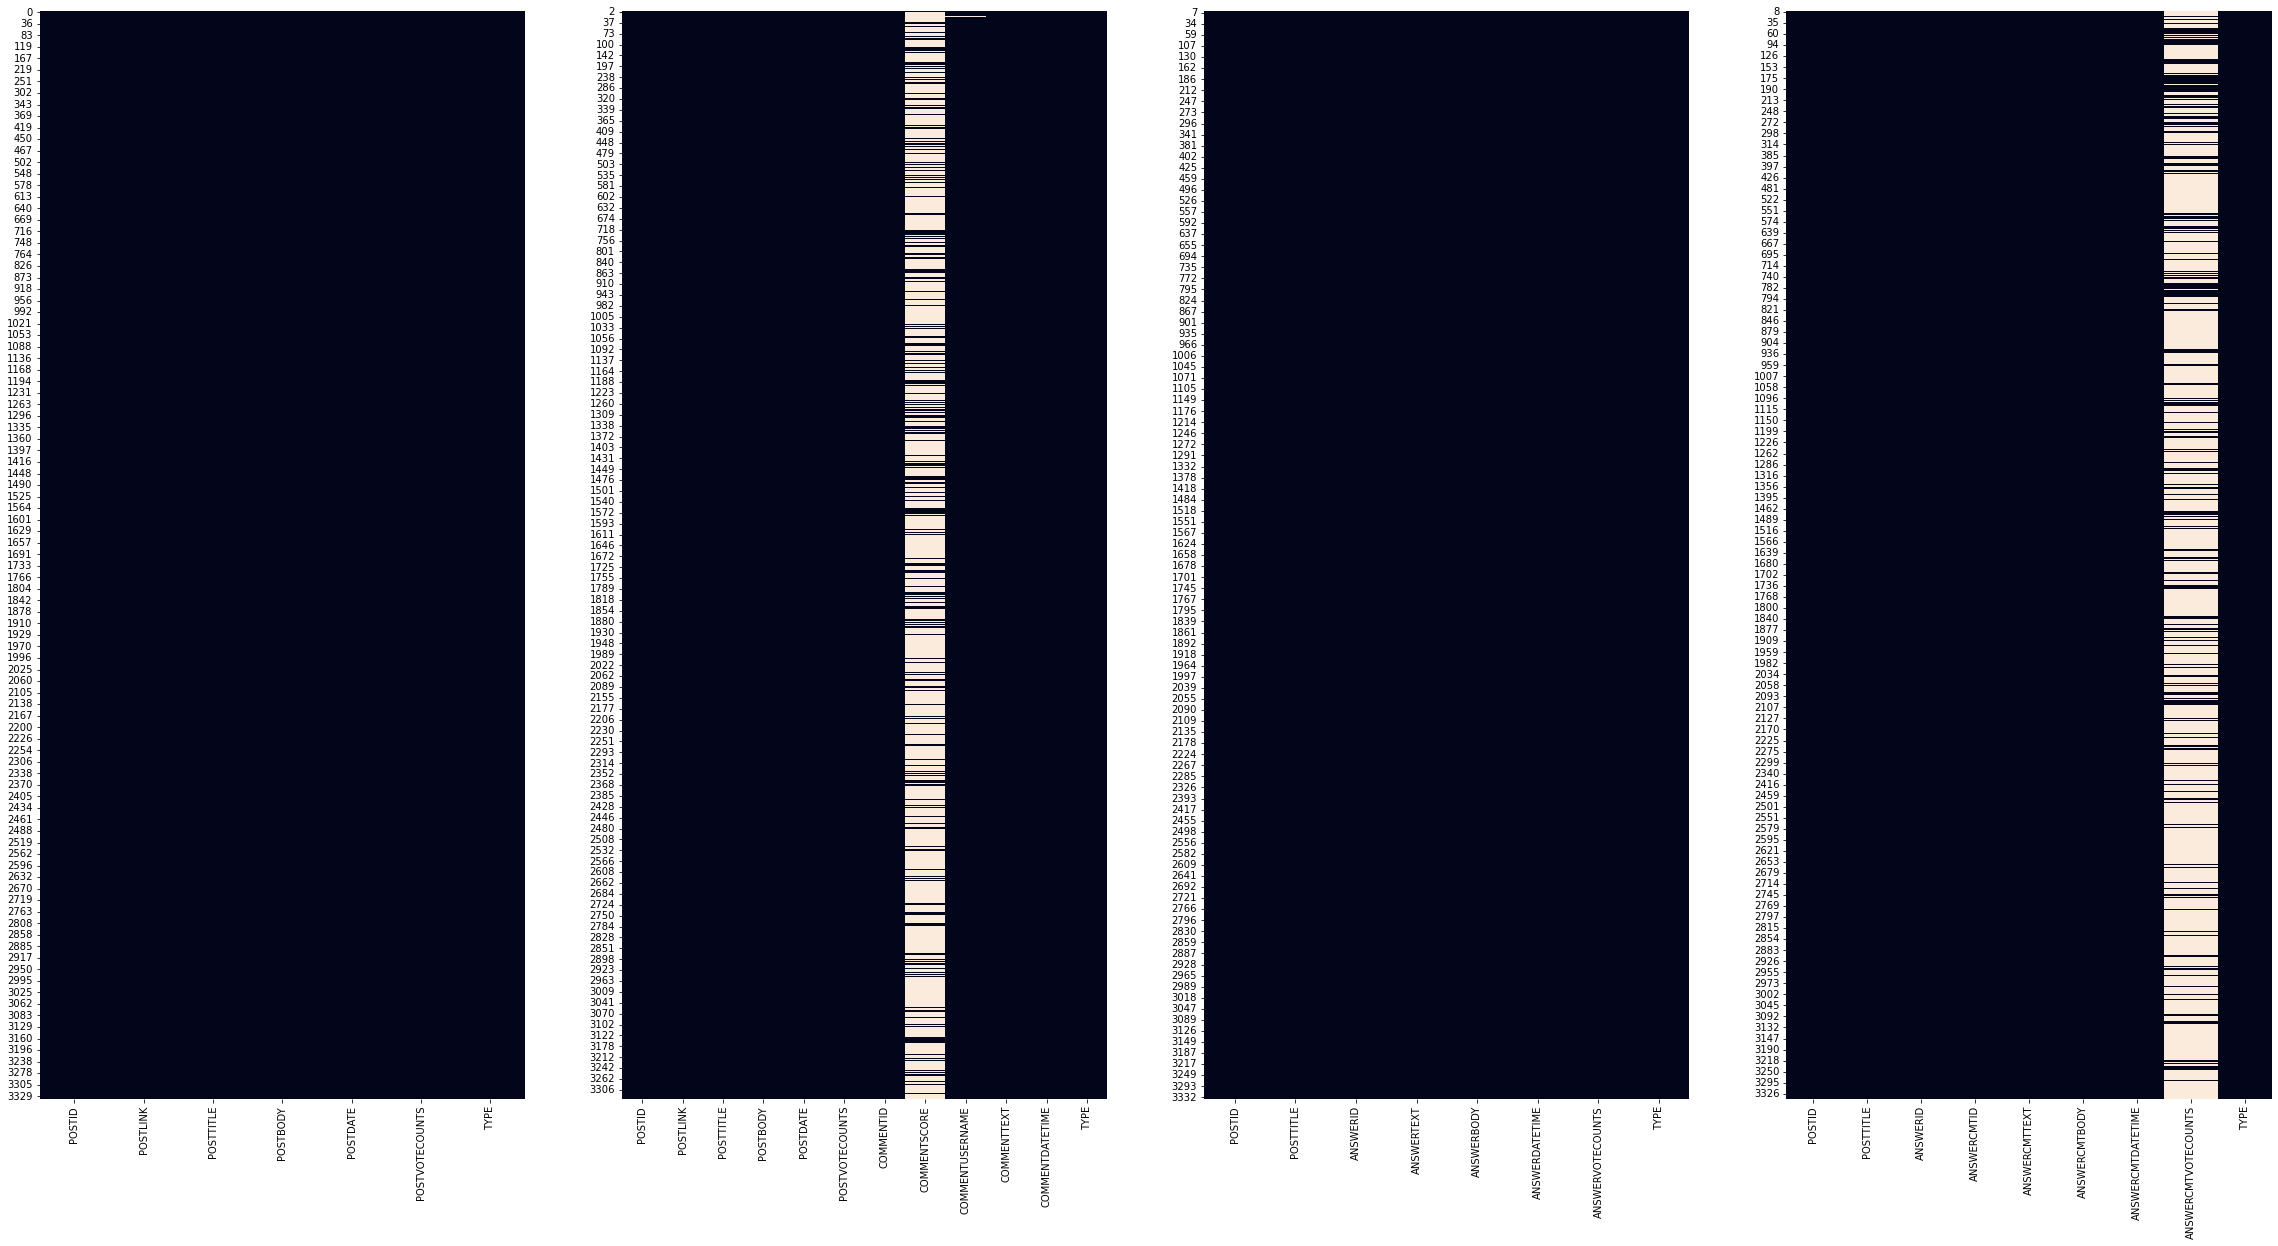

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
sns.heatmap(dPOST.isnull(), cbar=False, ax=axs[0])
sns.heatmap(dfPC.isnull(), cbar=False, ax=axs[1])
sns.heatmap(dfAAC.isnull(), cbar=False, ax=axs[2])
sns.heatmap(dFACT.isnull(), cbar=False, ax=axs[3])
plt.show()

In [6]:
# replace nan values to 0 
dfPC = dfPC.fillna(0)
dFACT = dFACT.fillna(0)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

POSTID                                           POSTLINK  \
0  75158231  https://stackoverflow.com/questions/75158231/r...   

                                           POSTTITLE  \
0  React useEffect OnSubmit Rendering Post api mu...   

                                            POSTBODY              POSTDATE  \
0  \n                \n<pre class="lang-js s-code...  2023-01-18 11:02:43Z   

  POSTVOTECOUNTS  TYPE  
0              0  post

POSTID                                           POSTLINK  \
2  75140656  https://stackoverflow.com/questions/75140656/h...   

                                           POSTTITLE  \
2  How do I set a timer on React/UseEffect hook a...   

                                            POSTBODY              POSTDATE  \
2  \n                \n<p>I'm trying to set a tim...  2023-01-16 23:25:33Z   

  POSTVOTECOUNTS          COMMENTID  COMMENTSCORE COMMENTUSERNAME  \
2              1  comment-132598809           1.0        jsejcksn   

                                         COMMENTTEXT       COMMENTDATETIME  \
2  Rather than <a href="https://en.wikipedia.org/...  2023-01-16 23:34:48Z   

           TYPE  
2  post_comment

POSTID                                          POSTTITLE    ANSWERID  \
7  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

                                          ANSWERTEXT  \
7  Here's a cleaner setup:\nMove the getUsers out...   

                                          ANSWERBODY        ANSWERDATETIME  \
7  ('\n<p>Here\'s a cleaner setup:</p>\n<ol>\n<li...  2023-01-16 23:54:17Z   

  ANSWERVOTECOUNTS    TYPE  
7                0  answer

POSTID                                          POSTTITLE    ANSWERID  \
8  75140656  How do I set a timer on React/UseEffect hook a...  75140750.0   

  ANSWERCMTID                                      ANSWERCMTTEXT  \
8   132598956  Using setTimeout like this without the users s...   

                                       ANSWERCMTBODY ANSWERCMTDATETIME  \
8  ('\n                \n                <span cl...        2 days ago   

  ANSWERCMTVOTECOUNTS            TYPE  
8                   0  answer_comment

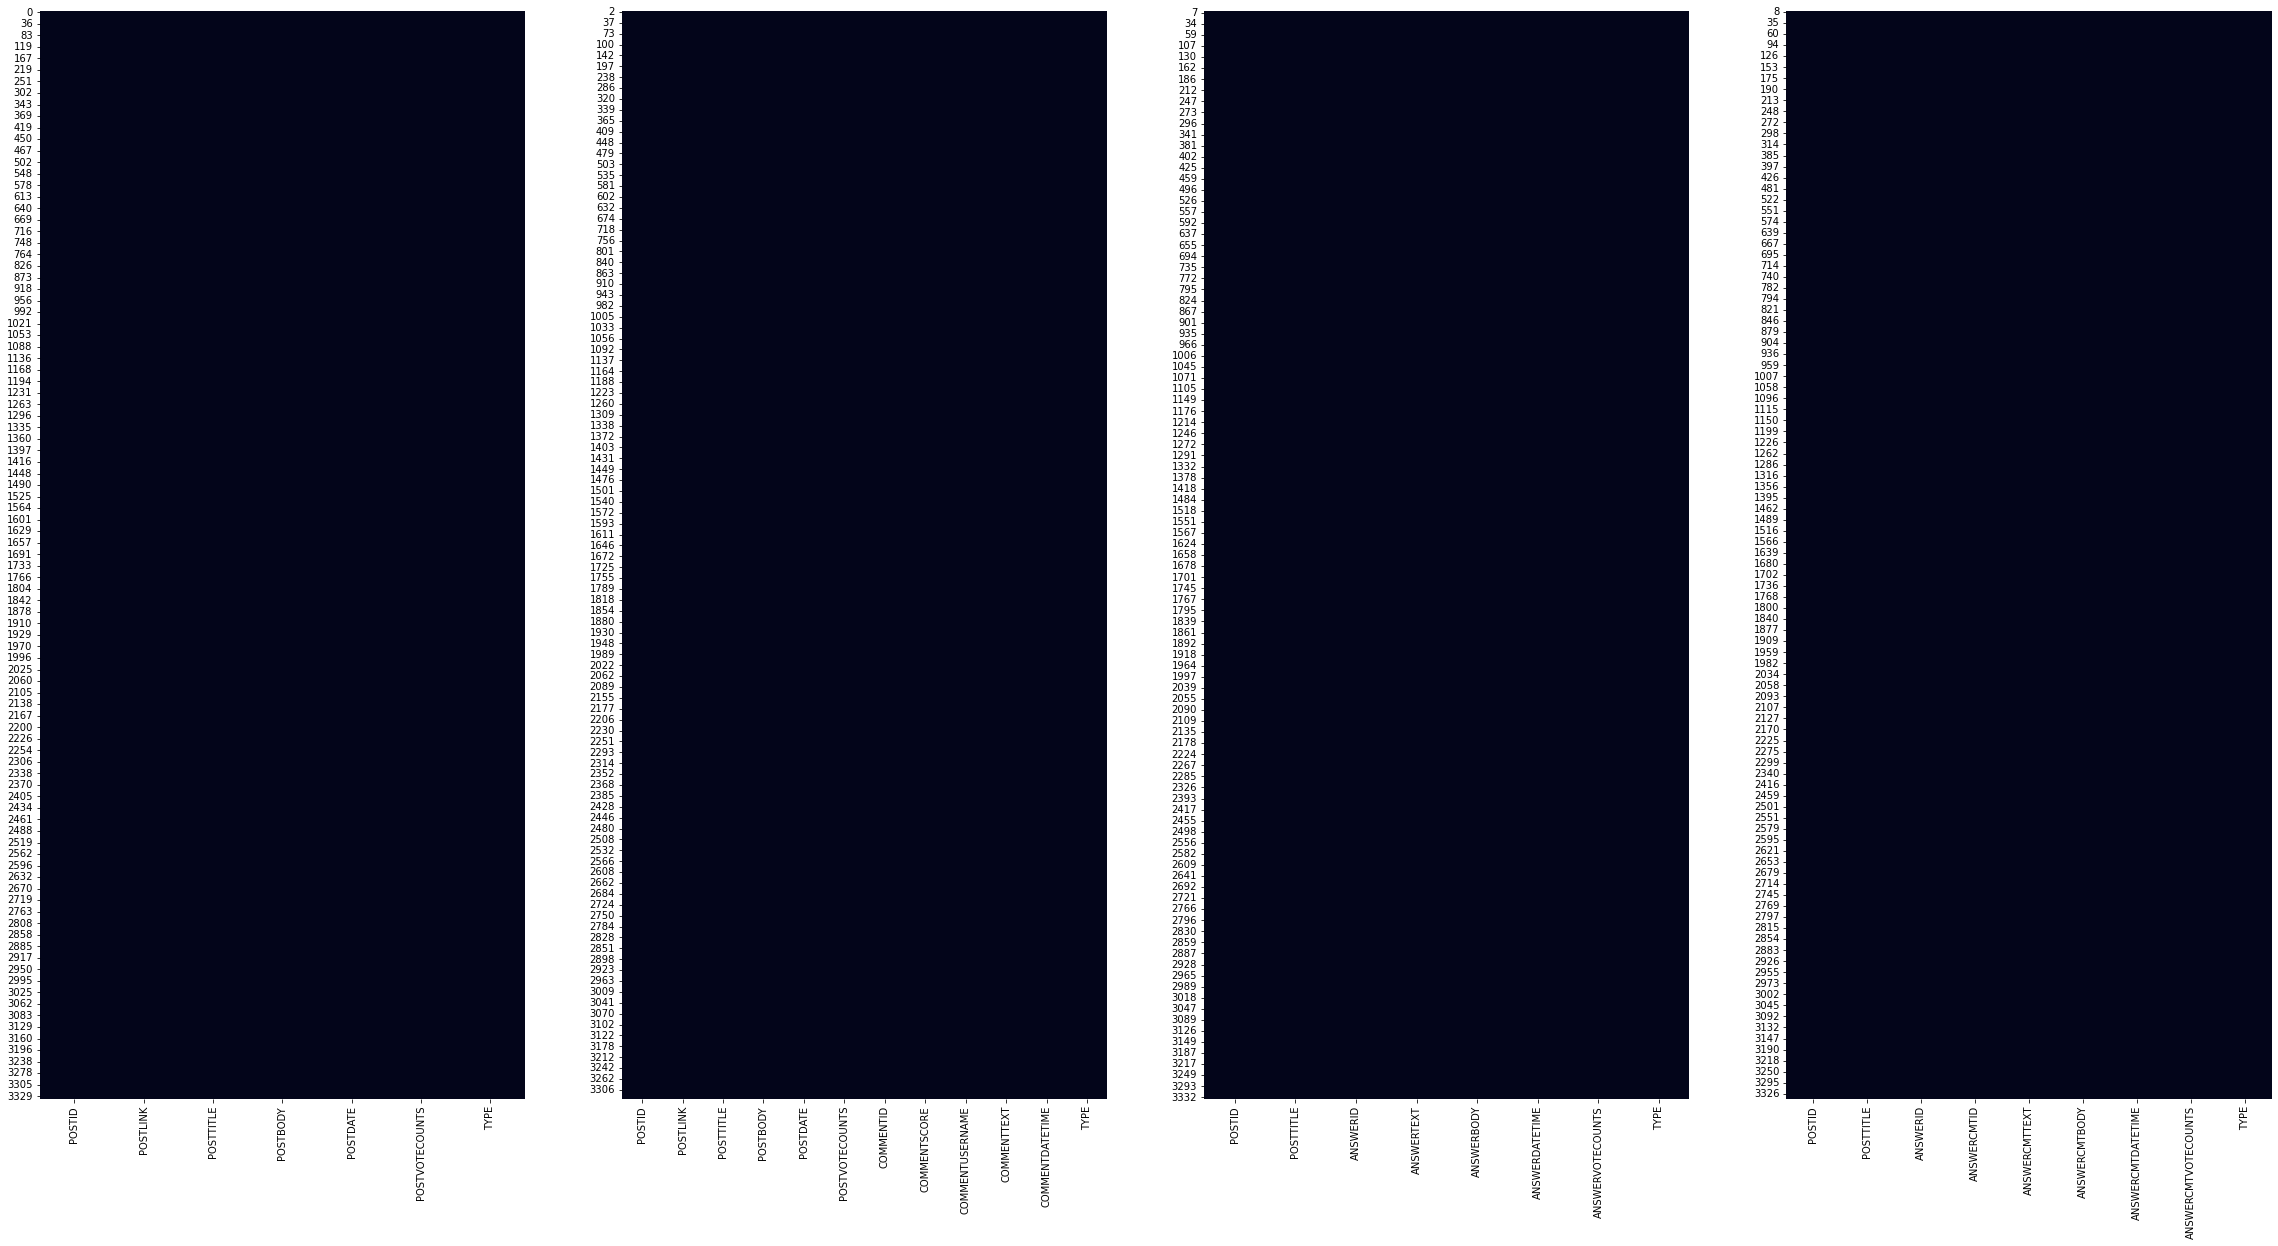

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
sns.heatmap(dPOST.isnull(), cbar=False, ax=axs[0])
sns.heatmap(dfPC.isnull(), cbar=False, ax=axs[1])
sns.heatmap(dfAAC.isnull(), cbar=False, ax=axs[2])
sns.heatmap(dFACT.isnull(), cbar=False, ax=axs[3])
plt.show()

<AxesSubplot:xlabel='ANSWERCMTVOTECOUNTS', ylabel='Density'>

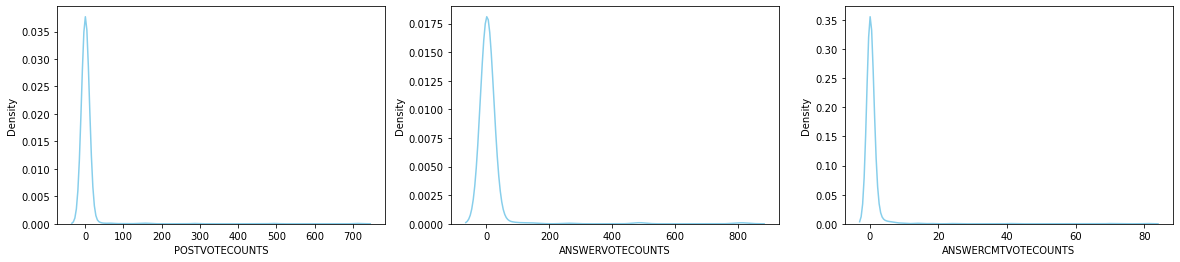

In [8]:
# show vote count distribution
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
sns.distplot(dPOST['POSTVOTECOUNTS'] , color="skyblue", ax=axs[0], bins=range(0, 10, 20))
sns.distplot(dfAAC['ANSWERVOTECOUNTS'] , color="skyblue", ax=axs[1], bins=range(0, 10, 20))
sns.distplot(dFACT['ANSWERCMTVOTECOUNTS'] , color="skyblue", ax=axs[2], bins=range(0, 10, 20))
# specify range 

In [9]:
# reset warnings
warnings.resetwarnings()

# Beginning of Idea A

### 1. String similarity to find related post

In [17]:
unique_values = df['POSTTITLE'].unique()
print("There are a total of {} unique titles".format(len(unique_values)))

query = 'How to solve useEffect hook rerenders infinitely?'
# query 1 = 'Useeffect hook rerenders infinitely'
# query 2 = 'Fetching data - useEffect hook'
# query 3 = 'How to use the useEffect hook?'
# query 4 = "useEffect hook doesn't work"
# query 5 = "Use effect hook with use state"

There are a total of 660 unique titles


#### 1.1 Fuzzy Wuzzy

In [18]:
def calPartialRatio (str1, str2):
    return fuzz.partial_ratio(str1, str2)

def calTokenSortRatio (str1, str2):
    return fuzz.token_sort_ratio(str1, str2)

fuzzywuzzy_df = pd.DataFrame(columns=['postId', 'title', 'partial_ratio', 'token_sort_ratio'])
for unique_value in unique_values:
    # find the postId of the unique value
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    fuzzywuzzy_df = pd.concat([fuzzywuzzy_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'partial_ratio': calPartialRatio(unique_value, query), 'token_sort_ratio': calTokenSortRatio(unique_value, query)}, index=[0])], )

matchesPR = fuzzywuzzy_df.sort_values(by=['partial_ratio'], ascending=False)
matchesPR = matchesPR[matchesPR['partial_ratio'] > 50]

matchesTS = fuzzywuzzy_df.sort_values(by=['token_sort_ratio'], ascending=False)
matchesTS = matchesTS[matchesTS['token_sort_ratio'] > 50]

Top10MathesMerged = pd.concat([matchesTS, matchesPR]).drop_duplicates()
Top10MathesMerged['average'] = (Top10MathesMerged['token_sort_ratio'] + Top10MathesMerged['partial_ratio']) / 2
Top10MathesMerged = Top10MathesMerged.sort_values(by=['average'], ascending=False)


Top10MathesMerged = Top10MathesMerged[Top10MathesMerged['average'] > 50]
display(Top10MathesMerged)
print("{} number of titles found".format(len(Top10MathesMerged)))

postId                                              title partial_ratio  \
0   73534338               React UseEffect render infinite loop            72   
0   64651759          react useEffect hook causes infinite loop            72   
0   58557877                 React useEffect hook infinity loop            68   
0   62568196                    React useEffect not rerendering            77   
0   64917867  How to sto React useEffect hook from rendering...            71   
..       ...                                                ...           ...   
0   56831803  Prevent infinite loop when updating state via ...            45   
0   63540163  React useEffect: Why is my value undefined ini...            55   
0   67658202             React useEffect syntax reason on mount            50   
0   58830374                   React useEffect for Loading Data            53   
0   61433211      React useEffect hook loop, dependency problem            58   

   token_sort_ratio average  
0                67    69.5  
0                63    67.5  
0                66    67.0  
0                56    66.5  
0                60    65.5  
..              ...     ...  
0                56    50.5  
0                46    50.5  
0                51    50.5  
0                48    50.5  
0                43    50.5  

[132 rows x 5 columns]

132 number of titles found


#### 1.2 Bag of words approach (https://stackoverflow.com/questions/51623595/better-approach-than-fuzzywuzzy)

In [12]:
bag_words_df = pd.DataFrame(columns=['postId', 'title', 'score'])

def myScore(lst1, lst2):
    c = sum(el in lst1 for el in lst2)
    if (len(lst1) == 0 or len(lst2) == 0):
        retval = 0.0
    else:
        retval = 0.5 * (c/len(lst1) + c/len(lst2))

    return retval

query_tokenized = nltk.word_tokenize(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    bag_words_df = pd.concat([bag_words_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': myScore(nltk.word_tokenize(unique_value), query_tokenized)}, index=[0])], )

TopMatchesBOW = bag_words_df.sort_values(by=['score'], ascending=False)
TopMatchesBOW = TopMatchesBOW[TopMatchesBOW['score'] > 0.5]
display(TopMatchesBOW)

Empty DataFrame
Columns: [postId, title, score]
Index: []

#### 1.3 Spacy Similarity (https://stackoverflow.com/questions/52113939/spacy-strange-similarity-between-two-sentences)

In [19]:
spacy_sim = pd.DataFrame(columns=['postId', 'title', 'score'])
search_doc_no_stop_words = nlp(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    spacy_sim = pd.concat([spacy_sim, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': search_doc_no_stop_words.similarity(nlp(unique_value))}, index=[0])], )

TopMatchesSpacy = spacy_sim.sort_values(by=['score'], ascending=False)
TopMatchesSpacy = TopMatchesSpacy[TopMatchesSpacy['score'] > 0.5]

display(TopMatchesSpacy)
print("{} number of titles found".format(len(TopMatchesSpacy)))

postId                                              title     score
0   65404350  How to correctly add event listener to React u...  0.902468
0   70710122  How to use setInterval with react useEffect ho...  0.899317
0   72632981  How to fulfill React useEffect missing depende...  0.871420
0   74609238  How to stop the infinite loop inside this Reac...  0.861767
0   67343507  How to give a boolean indicator to React useEf...  0.833936
..       ...                                                ...       ...
0   70790681  React useEffect dependency not triggering from...  0.507214
0   72784960  I dont understand why this infinite loop wont ...  0.505654
0   70110116                 React useEffect does infinite loop  0.504187
0   71157226  Why is React useeffect not updated when props ...  0.502435
0   73369425                  React useEffect invalid hook call  0.500079

[195 rows x 3 columns]

195 number of titles found


After testing, we observed that 
1. If the query is short and abstract, The fuzzy wuzzy method gives us a more accurate score
2. In the contradictary, if the query is long and comprehensive, The spacy similarity method gives a more accurate score

## 2. Group all comments into post

In [23]:
class GroupedComments: 
    def __init__(self, title, post, post_comments, answers, answer_comments): 
        self.title = title
        self.post = post
        self.post_comments = post_comments
        self.answers = answers
        self.answer_comments = answer_comments
        

def grouping(titleArr): 
    grouped = []
    for title in titleArr:
        post = dPOST[dPOST['POSTTITLE'].str.contains(title)]
        post_comments = dfPC[dfPC['POSTTITLE'].str.contains(title)]
        answers = dfAAC[dfAAC['POSTTITLE'].str.contains(title)]
        answer_comments = dFACT[dFACT['POSTTITLE'].str.contains(title)]
        grouped.append(GroupedComments(title, post, post_comments, answers, answer_comments))
    return grouped 

allcommentsGrouped = grouping(TopMatchesSpacy['title'].tolist())

display(allcommentsGrouped[2].post_comments)
display(allcommentsGrouped[2].answers)
display(allcommentsGrouped[2].answer_comments)

POSTID                                           POSTLINK  \
2665  59059431  https://stackoverflow.com/questions/59059431/r...   
2666  59059431  https://stackoverflow.com/questions/59059431/r...   
2667  59059431  https://stackoverflow.com/questions/59059431/r...   
2668  59059431  https://stackoverflow.com/questions/59059431/r...   
2669  59059431  https://stackoverflow.com/questions/59059431/r...   
2943  60984978  https://stackoverflow.com/questions/60984978/r...   
2944  60984978  https://stackoverflow.com/questions/60984978/r...   
2945  60984978  https://stackoverflow.com/questions/60984978/r...   

                                              POSTTITLE  \
2665  React useeffect hook behaving not like i expected   
2666  React useeffect hook behaving not like i expected   
2667  React useeffect hook behaving not like i expected   
2668  React useeffect hook behaving not like i expected   
2669  React useeffect hook behaving not like i expected   
2943                               React useeffect hook   
2944                               React useeffect hook   
2945                               React useeffect hook   

                                               POSTBODY              POSTDATE  \
2665  \n                \n<p>I am using react <code>...  2019-11-26 21:15:19Z   
2666  \n                \n<p>I am using react <code>...  2019-11-26 21:15:19Z   
2667  \n                \n<p>I am using react <code>...  2019-11-26 21:15:19Z   
2668  \n                \n<p>I am using react <code>...  2019-11-26 21:15:19Z   
2669  \n                \n<p>I am using react <code>...  2019-11-26 21:15:19Z   
2943  \n                \n<p>I'm having the followin...  2020-04-02 05:50:24Z   
2944  \n                \n<p>I'm having the followin...  2020-04-02 05:50:24Z   
2945  \n                \n<p>I'm having the followin...  2020-04-02 05:50:24Z   

     POSTVOTECOUNTS          COMMENTID  COMMENTSCORE   COMMENTUSERNAME  \
2665              0  comment-104358901           0.0    Brian Thompson   
2666              0  comment-104359006           0.0             Faruk   
2667              0  comment-104359045           0.0  Ricardo Gonzalez   
2668              0  comment-104359143           0.0             Faruk   
2669              0  comment-104359259           1.0  Ricardo Gonzalez   
2943              0  comment-107894054           1.0       Utsav Patel   
2944              0  comment-107894458           0.0             jcruz   
2945              0  comment-107894480           0.0             jcruz   

                                            COMMENTTEXT       COMMENTDATETIME  \
2665  I deleted my answer, I think there were some p...  2019-11-26 21:38:03Z   
2666  i am modifying the exact document values i lis...  2019-11-26 21:42:39Z   
2667  have you tried to use <code>get</code> method ...  2019-11-26 21:44:24Z   
2668  @RicardoGonzalez no i didnt, but can onSnapsho...  2019-11-26 21:48:54Z   
2669  As i understand i think that one of the <code>...  2019-11-26 21:54:19Z   
2943  Are you sure that your backend sends consisten...  2020-04-02 06:30:17Z   
2944  @UtsavPatel yes I'm testing my backend API wit...  2020-04-02 06:47:39Z   
2945  When bad data is returned, it belongs to anoth...  2020-04-02 06:48:27Z   

              TYPE  
2665  post_comment  
2666  post_comment  
2667  post_comment  
2668  post_comment  
2669  post_comment  
2943  post_comment  
2944  post_comment  
2945  post_comment

POSTID             POSTTITLE    ANSWERID  \
2946  60984978  React useeffect hook  60985024.0   

                                             ANSWERTEXT  \
2946  You have to convert the response to json with ...   

                                             ANSWERBODY        ANSWERDATETIME  \
2946  ('\n<p>You have to convert the response to jso...  2020-04-02 06:27:33Z   

     ANSWERVOTECOUNTS    TYPE  
2946                0  answer

POSTID             POSTTITLE    ANSWERID ANSWERCMTID  \
2947  60984978  React useeffect hook  60985024.0   107893975   

                                          ANSWERCMTTEXT  \
2947  I've tried using both axios and fetch, now I'm...   

                                          ANSWERCMTBODY    ANSWERCMTDATETIME  \
2947  ('\n                \n                <span cl...  Apr 2, 2020 at 6:27   

     ANSWERCMTVOTECOUNTS            TYPE  
2947                   0  answer_comment

In [24]:
display(allcommentsGrouped[2].answers['ANSWERBODY'].iloc[0])

'(\'\\n<p>You have to convert the response to json with await response.json();\\nand then use setState.</p>\\n\\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \\n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \\n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\\n        <span class="hljs-keyword">const</span> responseData = <span class="hljs-keyword">await</span> response.<span

In [25]:
allCommentsGroupedCleanedDict = {}
for idx, item in enumerate(allcommentsGrouped):
    comments = []
    answers = []
    answers_cmts = []
    
    for (index, comment) in item.post_comments['COMMENTTEXT'].iteritems():
      comment_idx = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTID'].tolist()[0]
      comment_votes = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTSCORE'].tolist()[0]
      comment_dt = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTDATETIME'].tolist()[0]
      if str(comment) != 'nan':
        comments.append({
          "comment": comment, 
          "id": comment_idx,
          "votes": comment_votes,
          "datetime": comment_dt
        })
    comments_joined = ' '.join([str(elem['comment']) for elem in comments])

    for (index, answer) in item.answers['ANSWERBODY'].iteritems():
      answer_idx = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERID'].tolist()[0]
      answer_votes = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERVOTECOUNTS'].tolist()[0]
      answer_dt = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERDATETIME'].tolist()[0]
      if str(answer) != 'nan':
        answers.append({
          "answer": answer,
          "id": answer_idx,
          "votes": answer_votes,
          "datetime": answer_dt
        })
        
    answers_joined = ' '.join([str(elem['answer']) for elem in answers])
    
    for (index, answer_cmt) in item.answer_comments['ANSWERCMTBODY'].iteritems():
      answer_cmt_idx = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTID'].tolist()[0]
      answer_cmt_votes = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTVOTECOUNTS'].tolist()[0]
      answer_cmt_dt = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTDATETIME'].tolist()[0]
      if str(answer_cmt) != 'nan':
        answers_cmts.append({
          "answer_cmt": answer_cmt,
          "id": 1,
          "votes": answer_cmt_votes,
          "datetime": answer_cmt_dt
        })
        
    answers_cmts_joined = ' '.join([str(elem['answer_cmt']) for elem in answers_cmts])
    
    allCommentsGroupedCleanedDict[item.title] = {
      "comments": comments,
      "answers": answers,
      "answer_comments": answers_cmts,
      "comments_joined": comments_joined,
      "answers_joined": answers_joined,
      "answers_cmts_joined": answers_cmts_joined
    }

print("{} number of post instances".format(len(allCommentsGroupedCleanedDict)))

print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_44314/3825044782.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, comment) in item.post_comments['COMMENTTEXT'].iteritems():
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_44314/3825044782.py:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, answer) in item.answers['ANSWERBODY'].iteritems():
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_44314/3825044782.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, answer_cmt) in item.answer_comments['ANSWERCMTBODY'].iteritems():


58 number of post instances
Can I use an if statement within a React useEffect hook like this?:
  answer_comments: []
  answers: []
  answers_cmts_joined: ''
  answers_joined: ''
  comments: []
  comments_joined: ''
Confusing React useEffect hook behaviour:
  answer_comments:
  - answer_cmt: '(''\n                \n                <span class="comment-copy">well
      explained. I get the concept of closure over surrounding scope at render time.
      It completely makes sense now. Thanks for the effort.</span>\n                \n                <div
      class="d-inline-flex ai-center">\n–&nbsp;<a href="/users/14843021/chief-dot101"
      title="111 reputation" class="comment-user owner">chief dot101</a>\n                </div>\n                <span
      class="comment-date" dir="ltr"><a class="comment-link" href="#comment121656393_68837638"
      aria-label="Link to comment"><span title="2021-08-18 18:43:26Z, License: CC
      BY-SA 4.0" class="relativetime-clean">Aug 18, 2021 at 

## 3. Preprocessing

In [26]:
stopwords = set(stopwords.words('english'))

#### 3.1 Finding tech related stop words

#### 3.2 Extract url from text

In [27]:
def extractUrl(text):
    # get url from text
    text = re.findall(r'(https?://\S+)', text)
    return text

#### 3.3 Remove code blocks

In [28]:
def removeCodeBlocks(text):
    # remove blocks with classname code-block
    text = re.sub(r'<pre class="code-block">.*?</pre>', '', text, flags=re.DOTALL)
    # remove code tag
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    # remove every code tag with class name
    text = re.sub(r'<code class=".*?">.*?</code>', '', text, flags=re.DOTALL)
    return text
  
def removeSpaces(text):
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text
  
def removeslashn(text):
    # remove multiple spaces
    text = re.sub(r'\n\n\n ', ' ', text)
    return text

#### 3.4 Remove HTML Tags

In [29]:
def removeHTMLTags(text):
    # remove html tags
    text = re.sub(r'<[^>]*>', '', text)
    return text

#### 3.5 Lemmetization

In [31]:
lemmer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v')) 
  
def stemming (text):
    return stemmer.stem(text)

##### 3.5.1 Looking into lemmer vs stemmer

In [43]:
temp_text = 'Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations.'
print(temp_text)

print(" \n")

tokenized_text = word_tokenize(temp_text)
lemmatized_text = " ".join([lemmer.lemmatize(w) for w in tokenized_text])

print(lemmatized_text)
print(" \n")

stemmerized = " ".join([stemmer.stem(w) for w in tokenized_text])

print(stemmerized)
print(" \n")

Imagine if that was a Web Socket and we were scheduling a new heartbeat tick every time we remounted; the server would be very angry at our apps heart palpitations.
 

Imagine if that wa a Web Socket and we were scheduling a new heartbeat tick every time we remounted ; the server would be very angry at our apps heart palpitation .
 

imagin if that wa a web socket and we were schedul a new heartbeat tick everi time we remount ; the server would be veri angri at our app heart palpit .
 



#### 3.6 Running the pipeline

#### 3.6.1 Group all processing task

In [44]:
def preprocessText(text):
  text = removeCodeBlocks(text)
  text = removeHTMLTags(text)
  text = re.sub(r'(https?://\S+)', '', text)
  text = text.replace("('", '')
  text = text.replace("',)", '')
  text = re.sub(r"\\n", '', text)
  text = re.sub(r'–&nbsp;', '', text)
  
  # remove empty spaces 
  text = removeSpaces(text)
  
  return text

#### 3.6.2 Testing the processing task

In [49]:
test_text = ('\n<p>You have to convert the response to json with await response.json();\nand then use setState.</p>\n\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\n        <span class="hljs-keyword">const</span> responseData = <span class="hljs-keyword">await</span> response.<span class="hljs-title function_">json</span>();\n        <span class="hljs-title function_">setLoading</span>(<span class="hljs-literal">false</span>);\n        <span class="hljs-title function_">setTopten</span>(responseData.<span class="hljs-property">data</span>);    \n        <span class="hljs-title function_">setError</span>(responseData.<span class="hljs-property">error</span>);    \n    };\n\n    fetchdata ();     \n}, []);\n</code></pre>\n    ',)
print(str(test_text))

print(" \n")

test_text = preprocessText(str(test_text))
print(test_text)

('\n<p>You have to convert the response to json with await response.json();\nand then use setState.</p>\n\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\n        <span class="hljs-keyword">const</span> responseData = <span class="hljs-keyword">await</span> response.<span class="hl

In [50]:
for key, value in allCommentsGroupedCleanedDict.items():
    allcomments = []
    allanswers = []
    allanswercomments = []
    
    if value['comments']:
      for comment in value['comments']:
        if comment['comment']:
          indi_comment = comment['comment']
          url = extractUrl(indi_comment)
          indi_comment = preprocessText(indi_comment)
          comment['comment'] = indi_comment
          comment['url'] = url
          allcomments.append(indi_comment)

    # processing answers
    if value['answers']:
      for answer in value['answers']:
        if answer['answer']:
          indi_answer = answer['answer']
          url = extractUrl(indi_answer)
          indi_answer = preprocessText(indi_answer)
          indi_answer = lemmatize_stemming(indi_answer)
          answer['answer'] = indi_answer
          answer['url'] = url
          allanswers.append(indi_answer)
          
    # processing answer_comments
    if value['answer_comments']:
      for answer_cmt in value['answer_comments']:
        if answer_cmt['answer_cmt']:
          indi_answer_cmt = answer_cmt['answer_cmt']
          url = extractUrl(indi_answer_cmt)
          indi_answer_cmt = preprocessText(indi_answer_cmt)
          answer_cmt['answer_cmt'] = indi_answer_cmt
          answer_cmt['url'] = url
          allanswercomments.append(indi_answer_cmt)
          
    value['comments_joined'] = ' '.join(allcomments)
    value['answers_joined'] = ' '.join(allanswers)
    value['answers_cmts_joined'] = ' '.join(allanswercomments)
    # replace the value of the key
    allCommentsGroupedCleanedDict[key] = value
    
print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

Can I use an if statement within a React useEffect hook like this?:
  answer_comments: []
  answers: []
  answers_cmts_joined: ''
  answers_joined: ''
  comments: []
  comments_joined: ''
Confusing React useEffect hook behaviour:
  answer_comments:
  - answer_cmt: ' well explained. I get the concept of closure over surrounding scope
      at render time. It completely makes sense now. Thanks for the effort. chief
      dot101 Aug 18, 2021 at 18:43 '
    datetime: Aug 18, 2021 at 18:43
    id: 1
    url: []
    votes: 0
  answers:
  - answer: 'to understand the output of the code, you need to understand the fundamental
      concepts of how react updates the state and the concept of a closure.state updates
      are asynchronousevery call to state setter function such as is scheduled - state
      is not updated immediately.as a result, logging the value of immediately after
      calling will log the old value of .state is constant within a particular render
      of a componentstate i

#### 3.5 Stop Words Removal (based on step 1)

In [46]:
# translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
# translate_table.update(dict((ord(char), None) for char in string.digits))

# # find tech related stop words
# tech_stopwords = set(stopwords.words('english'))

## 4. Sentence Scoring

In [51]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def frequencyCounting(text, verbose = False):
  translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
  translate_table.update(dict((ord(char), None) for char in string.digits))

  compiledCommentsForFirstPost = text.translate(translate_table)

  word_frequencies = {}
  for word in word_tokenize(compiledCommentsForFirstPost):
      word = SnowballStemmer("english").stem(word)
      if word not in stopwords:
          if word not in punctuation:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

  maximum_frequncy = max(word_frequencies.values(), default=0)
  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
  
  if(verbose):
    print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True))

  sentence_list = sent_tokenize(compiledCommentsForFirstPost)
  
  if(verbose):
    print('total sentences: ', len(sentence_list))

  sentence_scores = {}
  for sent in sentence_list:
      sentence = sent.split()
      for word in sentence:        
          if word.lower() in word_frequencies.keys():
              if sent not in sentence_scores.keys():
                  sentence_scores[sent] = word_frequencies[word.lower()]
              else:
                  sentence_scores[sent] += word_frequencies[word.lower()]
                  
  if(verbose):
    print('scores for sentences: ', sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True))
  
  return sentence_scores, sentence_list
  

results = []
for i in range(0, len(allCommentsGroupedCleanedDict)):
  comments_answers_answerscmt = allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['comments_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_cmts_joined']
  
  if(len(comments_answers_answerscmt) > 0):
    sentence_scores, sentence_list = frequencyCounting(comments_answers_answerscmt, verbose=False)
    results.append({
      "title": list(allCommentsGroupedCleanedDict.keys())[i],
      "sentence_scores": sentence_scores,
      "sentence_list": sentence_list
    })
    summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

for result in results:
  if len(result['sentence_scores']) == 0:
    averageSentenceScore = 0
    result['avg_score'] = 0
    result['sentence_scores'] = 0
    break
  
  averageSentenceScore = sum(result['sentence_scores'].values()) / len(result['sentence_scores'])
  result['sentence_scores'] = result['sentence_scores'].values()
  result['avg_score'] = averageSentenceScore

first_summary = pd.DataFrame(results)
first_summary = first_summary.sort_values(by=['avg_score'], ascending=False)
display(first_summary)

title  \
13           Confusing React useEffect hook behaviour   
4                        react useEffect hook cleanup   
15        React useEffect hook doesn't clear interval   
21  How can I make this React useEffect hook work ...   
10      React useEffect hook is causing infinite loop   
2                                React useeffect hook   
1           react useEffect hook causes infinite loop   
17     componentWillUnmount with React useEffect hook   
6               React useEffect hook dependency array   
3      Setting hook state inside React useEffect hook   
18                 React useEffect stop infinite loop   
11                  React useEffect invalid hook call   
19  React useeffect hook behaving not like i expected   
0                  React useEffect hook infinity loop   
20      React useEffect hook loop, dependency problem   
5   React useEffect hook load onsnapshot condition...   
16    How can I escape React useEffect infinite loop?   
9   React useEffect fetch hook makes endless calls...   
12                  React useEffect hook toggle issue   
7   React useEffect hook running infinite loop des...   
14  componentWillUnmount lifecycle with react usee...   
8                          Using react useEffect hook   
22  React UseEffect hook firing every time I click...   
23                      React useEffect infinite loop   
24  react useEffect hook triggers only once althou...   
25   React useEffect hook not calling mocked function   
26  How can i check whether the object changes whe...   
27  React useEffect runs every time I scroll after...   
28  React useEffect hook will cause an infinite lo...   
29  How do I set a timer on React/UseEffect hook a...   
30  Refreshing Bootstrap4 Modal using React useEff...   
31                         React useEffect hook issue   
32  React useEffect infinite loop despite empty array   
33  React useEffect hook does not call after recoi...   
34  How do I prevent unnecessary, repetitive side-...   
35    React useEffect hook event listener fired twice   
36               React UseEffect render infinite loop   
37  React useEffect hook referencing incorrect values   
38  React useEffect hook doesn't trigger when a de...   
39                       React useEffect endless loop   
40                 React useEffect does infinite loop   
41  React useEffect hook with empty dependency ren...   
42                React useEffect infinite loop cause   
43  How does react useEffect work with useState hook?   
44    Unexpected behaviour using React useEffect hook   
45  React useEffect hook missing dependencies lint...   
46  How do I fire React useEffect hook only once a...   
47  Can I use an if statement within a React useEf...   
48     React useEffect hook is not working with rails   
49  Loading spinner with react useEffect hook and ...   
50  How to use setInterval with react useEffect ho...   
51  Why is my React useEffect not loading again wh...   
52  How to stop the infinite loop inside this Reac...   
53  React useEffect hook does not fire when prop d...   
54  react useEffect async triggering eachother pro...   
55  React UseEffect hook only runs twice even with...   
56  Make React useEffect hook not run on initial r...   
57            React useEffect hook and eslint warning   

                                      sentence_scores  \
13                               (48.428571428571495)   
4            (1.9999999999999998, 30.428571428571406)   
15                                             (16.0)   
21                                      (2.25, 28.25)   
10                               (14.399999999999999)   
2   (4.7142857142857135, 4.142857142857142, 27.714...   
1                                (10.333333333333336)   
17  (0.5714285714285714, 14.571428571428573, 12.42...   
6                      (13.0, 9.666666666666666, 2.0)   
3             (12.333333333333337, 2.333333333333333)   
18  (6.000000000000001, 3.8000000000000007, 12.799...   


#### 4.1 Sentence Scoring Result Analysis

In [70]:
import warnings
warnings.filterwarnings('ignore')

first_summary_filtered = first_summary[first_summary['avg_score'] > 0]

first_summary_result_df = pd.DataFrame(columns=['title', 'avg_score', 'sentences_grouped'])
for index, row in first_summary_filtered.iterrows():
  sentences_grouped = []
  for sentence in row['sentence_list']:
    sentences_grouped.append(sentence)
      
  first_summary_result_df = first_summary_result_df.append({
    'title': row['title'],
    'avg_score': row['avg_score'],
    'sentences_grouped': "".join(sentences_grouped)
  }, ignore_index=True)
all_sentences = ""

for index, row in first_summary_result_df.iterrows():
  all_sentences += row['sentences_grouped']

warnings.resetwarnings()

print(len(all_sentences))

24936


#### 4.3 Plot Word Cloud

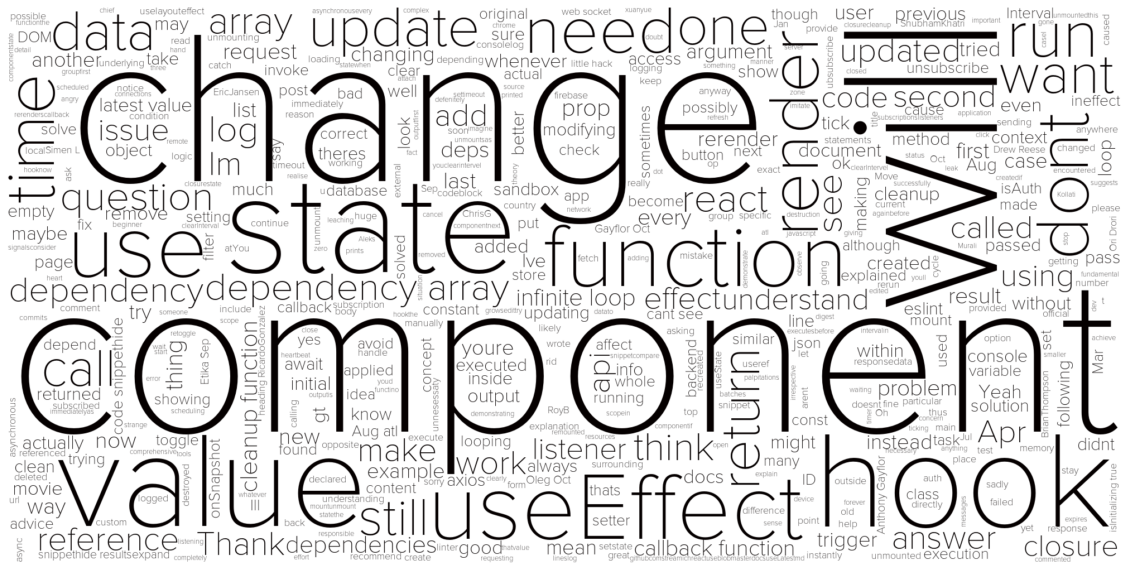

In [71]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

## 5. Sentiment Analysis

#### 5.1 Preparing the sentences

In [72]:
allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedDict)

allCommentsGroupedCleanedSentDict = {k: v for k, v in allCommentsGroupedCleanedSentDict.items() if v['comments'] or v['answers'] or v['answer_comments']}
for key, value in allCommentsGroupedCleanedSentDict.items():
  del value['answers_cmts_joined']
  del value['answers_joined']
  del value['comments_joined']
  
  # make new key 
  value['all_sentences'] = []
  all_comments_arr = []
  all_answers_arr = []
  all_answer_cmts_arr = []
   
  for comment in value['comments']:
    if comment['comment']: 
      all_comments_arr.append(comment['comment'])
    
  for answer in value['answers']:
    if answer['answer']:
      all_answers_arr.append(answer['answer'])
    
  for answer_cmt in value['answer_comments']:
    if answer_cmt['answer_cmt']:
      all_answer_cmts_arr.append(answer_cmt['answer_cmt'])

  value['all_sentences'] =  all_comments_arr + all_answers_arr + all_answer_cmts_arr
  
  # sentence tokenization
  value['all_sentences'] = [sent_tokenize(sentence) for sentence in value['all_sentences']]
  # flatten 
  value['all_sentences'] = [item for sublist in value['all_sentences'] for item in sublist]

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

Confusing React useEffect hook behaviour:
  all_sentences:
  - '1.'
  - State update is asynchronous.
  - '2.'
  - State is constant within a particular render of a component.
  - '3.'
  - Component can't see the updated state until it re-renders.
  - '4.'
  - Callback function of the hook has a closure over the state.
  - Thanks for your comment, but it's too much theory for a beginner like me.
  - I don't understand.
  - React batches all the useState updates and commits them at once since it is async.
  - But prints the value at the time when it is encountered and does not wait for
    react to update the status before logging the info
  - 'See: github.com/streamich/react-use/blob/master/docs/useLatest.md'
  - to understand the output of the code, you need to understand the fundamental concepts
    of how react updates the state and the concept of a closure.state updates are
    asynchronousevery call to state setter function such as is scheduled - state is
    not updated immediate

##### 5.2 Scoring post with sentiment

In [73]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
config = AutoConfig.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedSentDict)

for key, value in allCommentsGroupedCleanedSentDict.items():
  list_of_sentences = value['all_sentences']
  print('working on', key, 'with', len(list_of_sentences), 'sentences')
  print(yaml.dump(list_of_sentences, allow_unicode=True, default_flow_style=False))
  output = model(**tokenizer(list_of_sentences, padding=True, truncation=True, return_tensors="pt"))

  list_of_sentences_with_sentiment = []

  for j in range(len(list_of_sentences)):
    scores = output[0][j].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]

        if(list_of_sentences[j] not in [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment]):
          list_of_sentences_with_sentiment.append(
            {
              'sentence': list_of_sentences[j],
              l:  np.round(float(s), 4),
            }
          )
        else:
          index =  [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment].index(list_of_sentences[j])
          list_of_sentences_with_sentiment[index][l] = np.round(float(s), 4)
        

  averagePositiveSentimentScore = sum([ sentence['positive'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNegativeSentimentScore = sum([ sentence['negative'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNeutralSentimentScore = sum([ sentence['neutral'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  
  value['all_sentences_with_sentiment'] = list_of_sentences_with_sentiment
  value['avg_positive_sentiment'] = averagePositiveSentimentScore
  value['avg_negative_sentiment'] = averageNegativeSentimentScore
  value['avg_neutral_sentiment'] = averageNeutralSentimentScore

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


working on React useEffect hook infinity loop with 17 sentences
- I don't think the second variation can cause you an infinite loop since the effect
  will only run once.
- '@ShubhamKhatri you would think that but sadly it does'
- You should pass api function as dependency to useEffect.
- Can we see your PostApi code?
- '@ShubhamKhatri I updated the op and added the code there'
- change:and
- you can try like this.
- run code snippethide resultsexpand snippet
- ' Still endless looping Anthony Gayflor Oct 25, 2019 at 12:05'
- ' Can you post setPosts function Oleg Oct 25, 2019 at 12:09'
- ' Anthony Gayflor Oct 25, 2019 at 12:09'
- ' Post your functional component declaration in question Oleg Oct 25, 2019 at 12:11'
- ' What is useProfile?'
- may be useState ?
- Oleg Oct 25, 2019 at 12:25
- ' Sadly it’s still looping, I don’t understand why Anthony Gayflor Oct 25, 2019
  at 12:07'
- ' @AnthonyGayflor if it\''s still looping with an empty dependency array, it means
  the whole component is 

## 6. Rank Post

In [74]:
warnings.filterwarnings('ignore')

allCommentsSentiment = copy.deepcopy(allCommentsGroupedCleanedSentDict)

# sort by avg positive sentiment
allCommentsSentiment = {k: v for k, v in allCommentsSentiment.items() if v['avg_positive_sentiment'] or v['avg_negative_sentiment'] or v['avg_neutral_sentiment']}
allCommentsSentiment = {k: v for k, v in sorted(allCommentsSentiment.items(), key=lambda item: item[1]['avg_positive_sentiment'], reverse=True)}

ACS_df = pd.DataFrame()
for key, value in list(allCommentsSentiment.items()):
  ACS_df = ACS_df.append({
    'title': key,
    'avg_positive_sentiment': value['avg_positive_sentiment'],
    'avg_negative_sentiment': value['avg_negative_sentiment'],
    'avg_neutral_sentiment': value['avg_neutral_sentiment'],
    'sentence_list' : value['all_sentences']
  }, ignore_index=True)
warnings.resetwarnings()

ACS_df = ACS_df.sort_values(by=['avg_positive_sentiment'], ascending=False)
display(ACS_df.head(10))

title  avg_positive_sentiment  \
0  React useEffect hook does not call after recoi...                0.388967   
1  React useEffect hook does not fire when prop d...                0.356100   
2  react useEffect hook triggers only once althou...                0.349400   
3        React useEffect hook doesn't clear interval                0.281500   
4  How do I fire React useEffect hook only once a...                0.280633   
5    Unexpected behaviour using React useEffect hook                0.242813   
6           Confusing React useEffect hook behaviour                0.228324   
7                       react useEffect hook cleanup                0.214458   
8  Loading spinner with react useEffect hook and ...                0.209583   
9  componentWillUnmount lifecycle with react usee...                0.207567   

   avg_negative_sentiment  avg_neutral_sentiment  \
0                0.159183               0.451850   
1                0.113650               0.530250   
2                0.164017               0.486583   
3                0.159580               0.558960   
4                0.047675               0.671700   
5                0.160796               0.596396   
6                0.098843               0.672843   
7                0.230279               0.555279   
8                0.219074               0.571343   
9                0.058167               0.734267   

                                       sentence_list  
0  [One thing that stands out to me is that you a...  
1  [Did you try to pass different photo prop valu...  
2  [because there is no value change for error &a...  
3  [this may works for you:clearintervel when tim...  
4  [Why do you want to update from ?, Does the in...  
5  [The line where you have used useState hook, y...  
6  [1., State update is asynchronous., 2., State ...  
7  [I doubt, someone may explain that in more com...  
8  [why this statement : "I am using react hook u...  
9  [yes there is, everything is explained in the ...

#### 6.1 Rank Post Result Analysis

In [75]:
import warnings
warnings.filterwarnings('ignore')

second_summary_filtered = ACS_df.head(10)

second_summary_filtered_df = pd.DataFrame(columns=['title', 'avg_positive_sentiment', 'avg_negative_sentiment', 'avg_neutral_sentiment' 'sentences_grouped'])
for index, row in second_summary_filtered.iterrows():
  sentences_grouped = []
  for sentence in row['sentence_list']:
    sentences_grouped.append(sentence)
      
  second_summary_filtered_df = second_summary_filtered_df.append({
    'title': row['title'],
    'avg_positive_sentiment': row['avg_positive_sentiment'],
    'avg_negative_sentiment': row['avg_negative_sentiment'],
    'avg_neutral_sentiment': row['avg_neutral_sentiment'],
    'sentences_grouped': "".join(sentences_grouped)
  }, ignore_index=True)
all_sentences = ""

for index, row in second_summary_filtered_df.iterrows():
  all_sentences += row['sentences_grouped']

warnings.resetwarnings()

print(len(all_sentences))

13860


#### 6.2 Plot Word Cloud

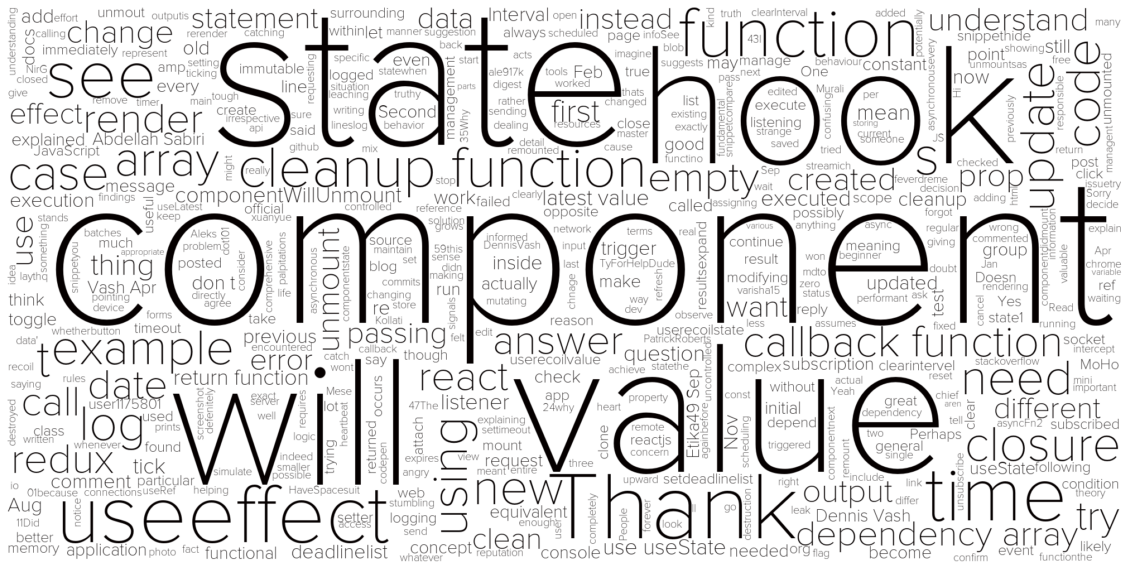

In [76]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

## 7. Summarize Top 5 

In [77]:
allCommentsSentimentSum = copy.deepcopy(allCommentsSentiment)
#only take top 5
allCommentsSentimentSum = {k: v for k, v in list(allCommentsSentimentSum.items())[:5]}

top_5_ACS_df = ACS_df.head(5)
display(top_5_ACS_df)

top_5_ACS_dict = top_5_ACS_df.to_dict('index')

print(top_5_ACS_dict)

title  avg_positive_sentiment  \
0  React useEffect hook does not call after recoi...                0.388967   
1  React useEffect hook does not fire when prop d...                0.356100   
2  react useEffect hook triggers only once althou...                0.349400   
3        React useEffect hook doesn't clear interval                0.281500   
4  How do I fire React useEffect hook only once a...                0.280633   

   avg_negative_sentiment  avg_neutral_sentiment  \
0                0.159183               0.451850   
1                0.113650               0.530250   
2                0.164017               0.486583   
3                0.159580               0.558960   
4                0.047675               0.671700   

                                       sentence_list  
0  [One thing that stands out to me is that you a...  
1  [Did you try to pass different photo prop valu...  
2  [because there is no value change for error &a...  
3  [this may works for you:clearintervel when tim...  
4  [Why do you want to update from ?, Does the in...

{0: {'title': 'React useEffect hook does not call after recoil atom updated', 'avg_positive_sentiment': 0.3889666666666667, 'avg_negative_sentiment': 0.15918333333333334, 'avg_neutral_sentiment': 0.45185000000000003, 'sentence_list': ['One thing that stands out to me is that you are directly modifying the recoil state with this: is a reference to the actual state.', 'You should instead clone the existing list.', '@HaveSpacesuit thanks for catching that!', 'when dealing with arrays in state hooks, you need to clone the array as you do the set function.also, instead of this:let [deadlinelist, setdeadlinelist] = userecoilvalue(deadlinelist);i would do this:const [deadlinelist, setdeadlinelist] = userecoilstate(deadlinelist);', ' Thanks!', 'I forgot to close it after stumbling my way to the solution but thanks for explaining why useRecoilState rather than useRecoilValue works feverdreme Jan 20, 2021 at 17:11']}, 1: {'title': 'React useEffect hook does not fire when prop dependency changes'

#### 7.1 Using BartLargeCNN by Hugging Face

In [83]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

top_5_ACS_dict_BART = copy.deepcopy(top_5_ACS_dict)

for key, value in top_5_ACS_dict_BART.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
    input_ids = tokenizer.encode(joined_sentence, return_tensors='pt')
    summary_ids = model.generate(input_ids)
    top_5_ACS_dict_BART[key]['summary'] = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
print(yaml.dump(top_5_ACS_dict_BART, allow_unicode=True, default_flow_style=False))

Summarizing  0


/Users/shaun/miniforge3/lib/python3.9/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summarizing  1
Summarizing  2
Summarizing  3
Summarizing  4
0:
  avg_negative_sentiment: 0.15918333333333334
  avg_neutral_sentiment: 0.45185000000000003
  avg_positive_sentiment: 0.3889666666666667
  sentence_list:
  - 'One thing that stands out to me is that you are directly modifying the recoil
    state with this: is a reference to the actual state.'
  - You should instead clone the existing list.
  - '@HaveSpacesuit thanks for catching that!'
  - when dealing with arrays in state hooks, you need to clone the array as you do
    the set function.also, instead of this:let [deadlinelist, setdeadlinelist] = userecoilvalue(deadlinelist);i
    would do this:const [deadlinelist, setdeadlinelist] = userecoilstate(deadlinelist);
  - ' Thanks!'
  - I forgot to close it after stumbling my way to the solution but thanks for explaining
    why useRecoilState rather than useRecoilValue works feverdreme Jan 20, 2021 at
    17:11
  summary: 'One thing that stands out to me is that you are directl

##### 7.1.1 Bart Large CNN Result Analysis

In [84]:
import warnings
warnings.filterwarnings('ignore')

third_summary_filtered = pd.DataFrame(top_5_ACS_dict_BART).T
display(third_summary_filtered)

all_sentences = ""
for index, row in third_summary_filtered.iterrows():
  all_sentences += row['summary']

warnings.resetwarnings()

print(len(all_sentences))

title avg_positive_sentiment  \
0  React useEffect hook does not call after recoi...               0.388967   
1  React useEffect hook does not fire when prop d...                 0.3561   
2  react useEffect hook triggers only once althou...                 0.3494   
3        React useEffect hook doesn't clear interval                 0.2815   
4  How do I fire React useEffect hook only once a...               0.280633   

  avg_negative_sentiment avg_neutral_sentiment  \
0               0.159183               0.45185   
1                0.11365               0.53025   
2               0.164017              0.486583   
3                0.15958               0.55896   
4               0.047675                0.6717   

                                       sentence_list  \
0  [One thing that stands out to me is that you a...   
1  [Did you try to pass different photo prop valu...   
2  [because there is no value change for error &a...   
3  [this may works for you:clearintervel when tim...   
4  [Why do you want to update from ?, Does the in...   

                                             summary  
0  One thing that stands out to me is that you ar...  
1  Did you try to pass different photo prop value...  
2  because there is no value change for error &am...  
3  clearintervel when timeout is zero by adding c...  
4  UseRef is exactly what I needed. What you need...

1563


#### 7.1.2 Plot Word Cloud

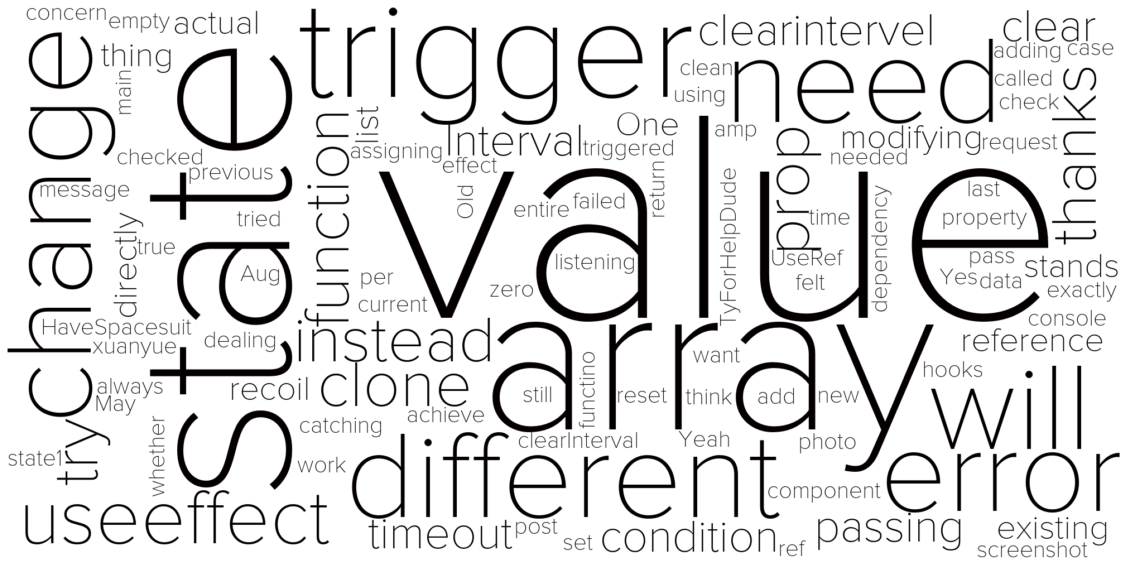

In [85]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

### 7.2 Pegasus-XSUM

In [86]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-xsum")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-xsum")

top_5_ACS_dict_PXSUM = copy.deepcopy(top_5_ACS_dict)

for key, value in top_5_ACS_dict_PXSUM.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
    input_ids = tokenizer.encode(joined_sentence, return_tensors='pt')
    summary_ids = model.generate(input_ids)
    top_5_ACS_dict_PXSUM[key]['summary'] = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
print(yaml.dump(top_5_ACS_dict_PXSUM, allow_unicode=True, default_flow_style=False))

Summarizing  0


/Users/shaun/miniforge3/lib/python3.9/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summarizing  1
Summarizing  2
Summarizing  3
Summarizing  4
0:
  avg_negative_sentiment: 0.15918333333333334
  avg_neutral_sentiment: 0.45185000000000003
  avg_positive_sentiment: 0.3889666666666667
  sentence_list:
  - 'One thing that stands out to me is that you are directly modifying the recoil
    state with this: is a reference to the actual state.'
  - You should instead clone the existing list.
  - '@HaveSpacesuit thanks for catching that!'
  - when dealing with arrays in state hooks, you need to clone the array as you do
    the set function.also, instead of this:let [deadlinelist, setdeadlinelist] = userecoilvalue(deadlinelist);i
    would do this:const [deadlinelist, setdeadlinelist] = userecoilstate(deadlinelist);
  - ' Thanks!'
  - I forgot to close it after stumbling my way to the solution but thanks for explaining
    why useRecoilState rather than useRecoilValue works feverdreme Jan 20, 2021 at
    17:11
  summary: 'HaveSpacesuit wrote: @HaveSpacesuit'
  title: React use

#### 7.2.1 Pegasus XSUM Result Analysis

In [87]:
import warnings
warnings.filterwarnings('ignore')

third_summary_filtered = pd.DataFrame(top_5_ACS_dict_PXSUM).T
display(third_summary_filtered)

all_sentences = ""
for index, row in third_summary_filtered.iterrows():
  all_sentences += row['summary']

warnings.resetwarnings()

print(len(all_sentences))

title avg_positive_sentiment  \
0  React useEffect hook does not call after recoi...               0.388967   
1  React useEffect hook does not fire when prop d...                 0.3561   
2  react useEffect hook triggers only once althou...                 0.3494   
3        React useEffect hook doesn't clear interval                 0.2815   
4  How do I fire React useEffect hook only once a...               0.280633   

  avg_negative_sentiment avg_neutral_sentiment  \
0               0.159183               0.45185   
1                0.11365               0.53025   
2               0.164017              0.486583   
3                0.15958               0.55896   
4               0.047675                0.6717   

                                       sentence_list  \
0  [One thing that stands out to me is that you a...   
1  [Did you try to pass different photo prop valu...   
2  [because there is no value change for error &a...   
3  [this may works for you:clearintervel when tim...   
4  [Why do you want to update from ?, Does the in...   

                                             summary  
0                HaveSpacesuit wrote: @HaveSpacesuit  
1  Mese I'm having the same issue, when I pass an...  
2  Is there a way to reset the error value &amp; ...  
3  Is there a way to clear previous and if condit...  
4  Is there a way to update a state once after it...

398


#### 7.2.2 Plot Word Cloud

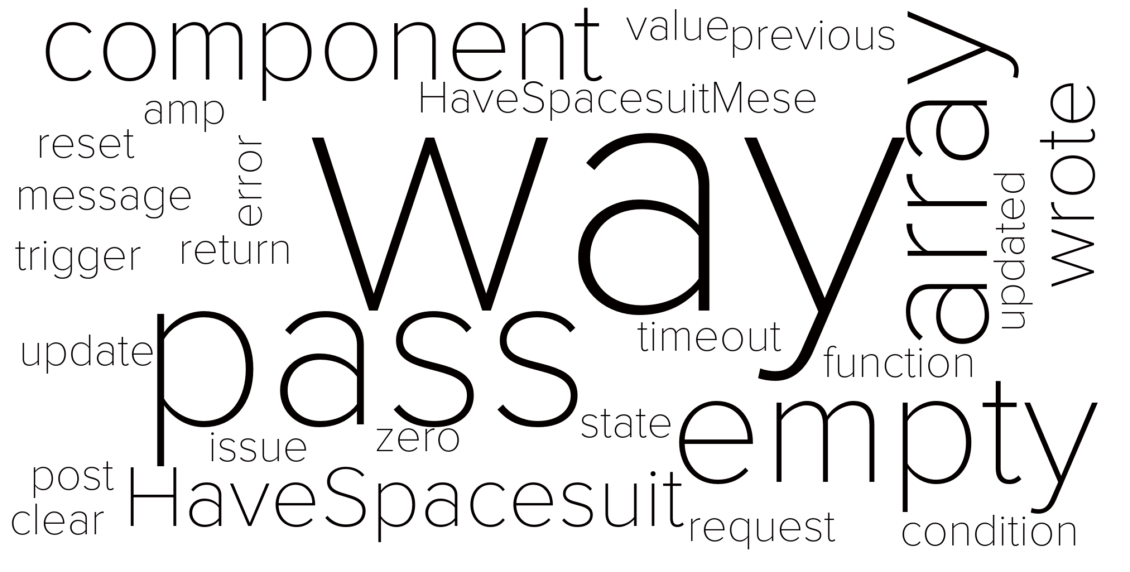

In [88]:
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

cloud = WordCloud(font_path = '/Users/shaun/Downloads/Fonts/proxima thin/Proxima Nova Thin.otf', background_color="white", width=2000, height=1000, max_words=500).generate(all_sentences)
cloud.recolor(color_func=black_color_func)
plt.figure(figsize=(20, 40))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

warnings.resetwarnings()

### 7.3 Comparing Both Deep Learning Models

##### We'll be comparing their summarized text based on a single question asked

In [89]:
pd.DataFrame(top_5_ACS_dict_PXSUM).T.to_csv('top_5_ACS_dict_PXSUM.csv')
pd.DataFrame(top_5_ACS_dict_BART).T.to_csv('top_5_ACS_dict_BART.csv')

In [97]:
pd.set_option('display.expand_frame_repr', False)

summary_compare_df = pd.DataFrame(top_5_ACS_dict_PXSUM).T['summary'].to_frame().join(pd.DataFrame(top_5_ACS_dict_BART).T['summary'].to_frame(), lsuffix='_pxsum', rsuffix='_bart')

for index, row in summary_compare_df.iterrows():
  print("Summary for ", index)
  print("Pegasus XSUM: ", row['summary_pxsum'])
  print("BART CNN: ", row['summary_bart'])
  print("")

Summary for  0
Pegasus XSUM:  HaveSpacesuit wrote: @HaveSpacesuit
BART CNN:  One thing that stands out to me is that you are directly modifying the recoil state with this: is a reference to the actual state. You should instead clone the existing list. @HaveSpacesuit thanks for catching that! when dealing with arrays in state hooks, you need to clone the array as you do the set function.

Summary for  1
Pegasus XSUM:  Mese I'm having the same issue, when I pass an empty array to a component, it does not trigger when I pass an empty array to the component.
BART CNN:  Did you try to pass different photo prop value to the component and checked whether the is triggered?. will trigger only when the new value is different from the Old Value. Yes, have tried using a different prop instead of passing an empty array and it still does not trigger the. as per the console screenshot, i felt your passing the same value.

Summary for  2
Pegasus XSUM:  Is there a way to reset the error value &amp; mes